In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape
df.info()
df.describe(include='all')
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [10]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [11]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [12]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

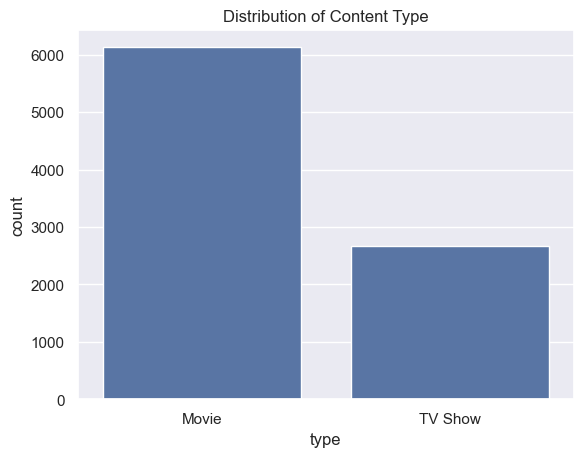

In [13]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type')
plt.show()

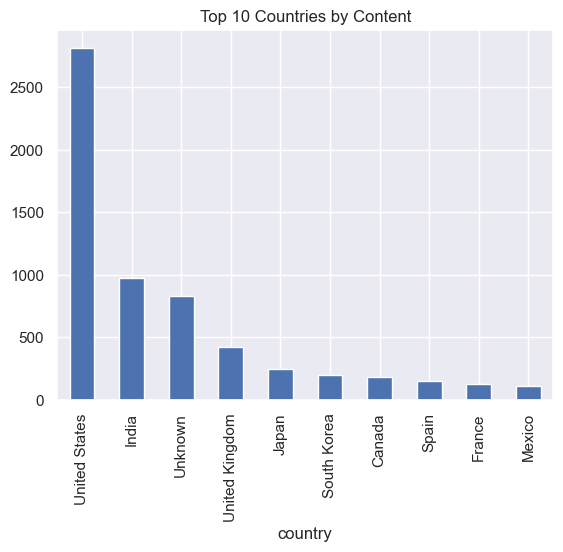

In [14]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Content')
plt.show()

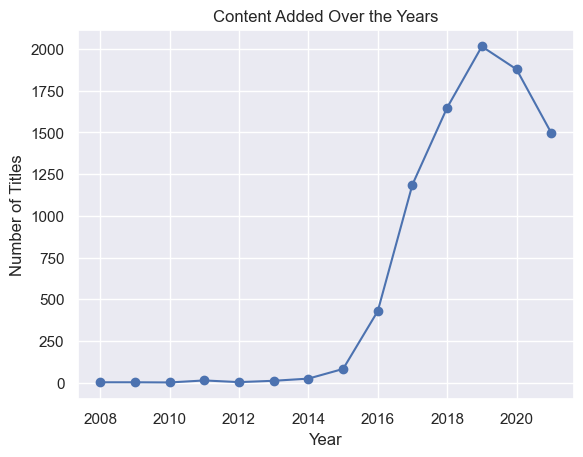

In [15]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

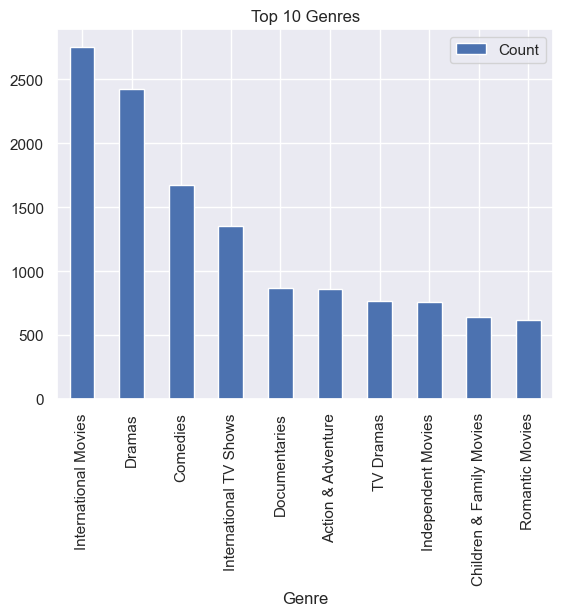

In [16]:
from collections import Counter

genres = df['listed_in'].str.split(', ')
all_genres = sum(genres.dropna(), [])
genre_counts = Counter(all_genres).most_common(10)

pd.DataFrame(genre_counts, columns=['Genre', 'Count']).set_index('Genre').plot(kind='bar')
plt.title('Top 10 Genres')
plt.show()

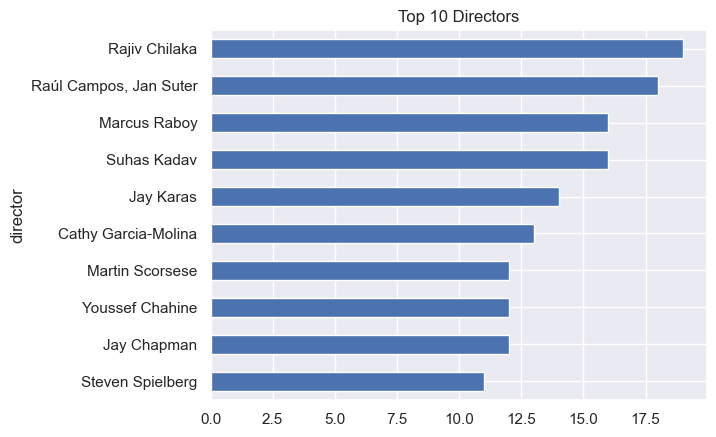

In [17]:
df[df['director'] != 'Unknown']['director'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Directors')
plt.gca().invert_yaxis()
plt.show()

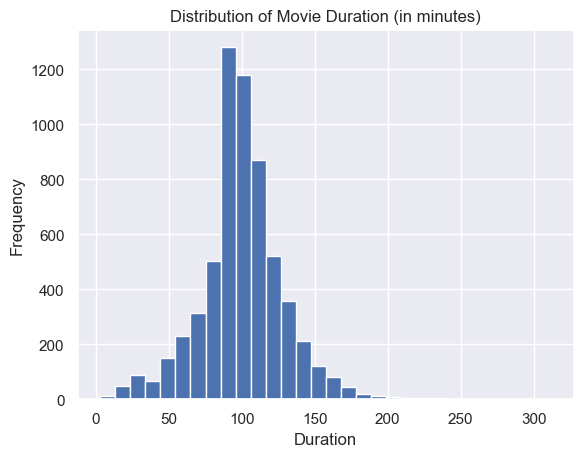

In [18]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration_num'].plot(kind='hist', bins=30)
plt.title('Distribution of Movie Duration (in minutes)')
plt.xlabel('Duration')
plt.show()

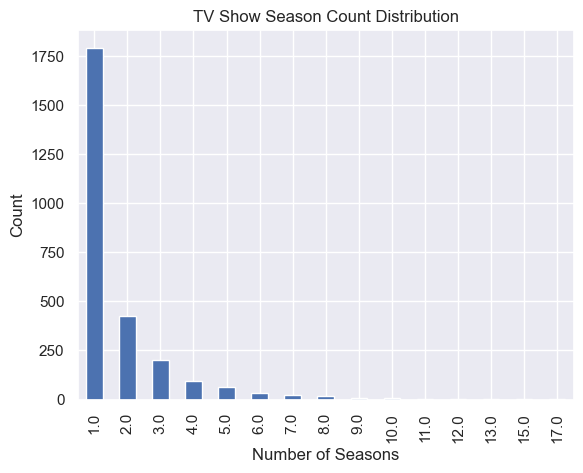

In [19]:
tv_df = df[df['type'] == 'TV Show']
tv_df['duration_num'].value_counts().sort_index().plot(kind='bar')
plt.title('TV Show Season Count Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()